In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

По характеристикам вина необходимо определить его качество.

In [323]:
red = pd.read_csv('winequality-red.csv', encoding='utf-8', delimiter=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [324]:
red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [325]:
white = pd.read_csv('winequality-white.csv', encoding='utf-8', delimiter=';')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [326]:
white['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [327]:
df = pd.concat([red, white], axis=0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Немножко упростим задачу и сделаем два класса.

In [328]:
df['quality'] = np.where(df['quality'] >5, 1, 0)

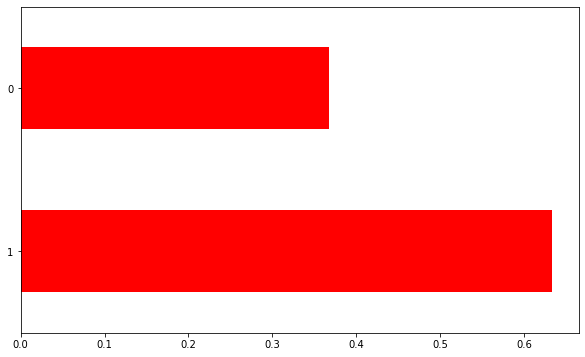

In [329]:
df['quality'].value_counts(normalize=True).plot(kind='barh', figsize=(10,6), color='r');

In [330]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.633061
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.482007
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


У некоторых переменных довольно высокое стандартное отклонение. Посмотрим на них.

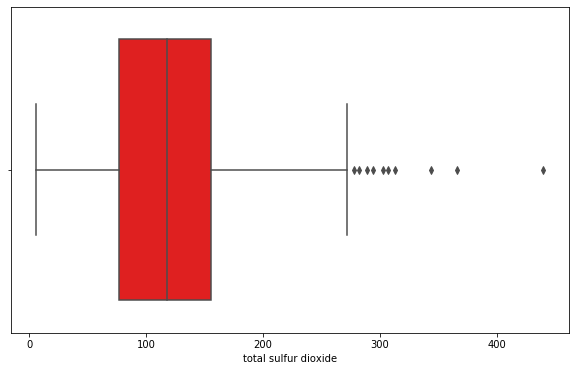

In [331]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total sulfur dioxide'], color='r');

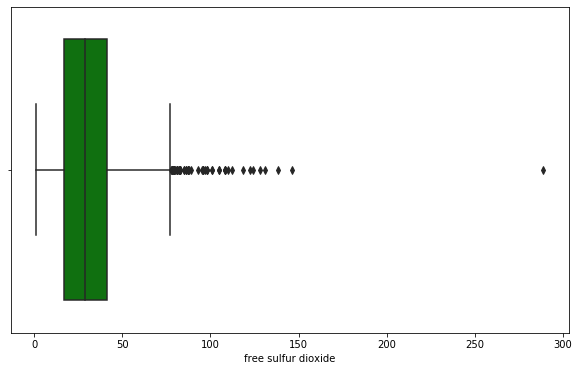

In [332]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['free sulfur dioxide'], color='g');

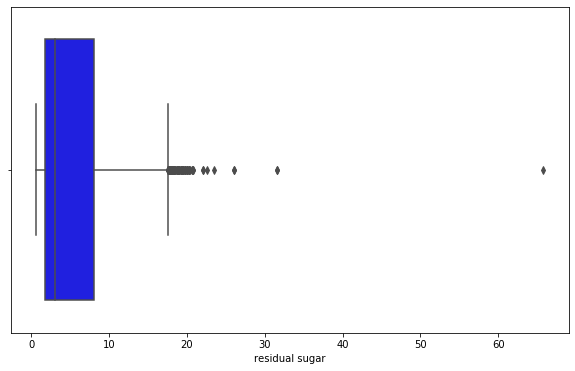

In [333]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['residual sugar'], color='b');

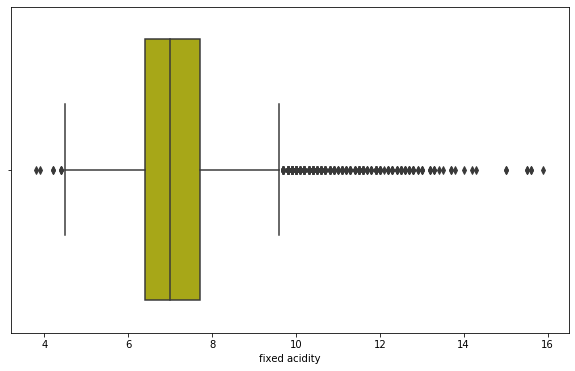

In [334]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fixed acidity'], color='y');

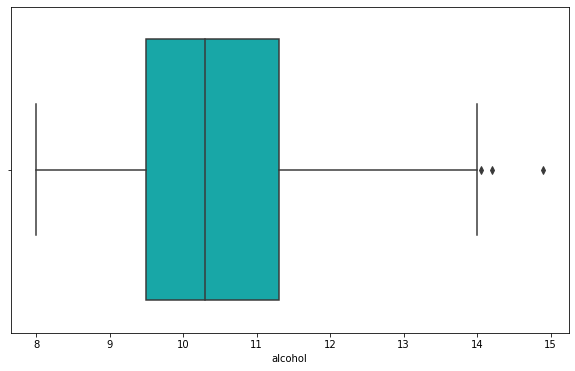

In [335]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['alcohol'], color='c');

Посмотрим на остальные.

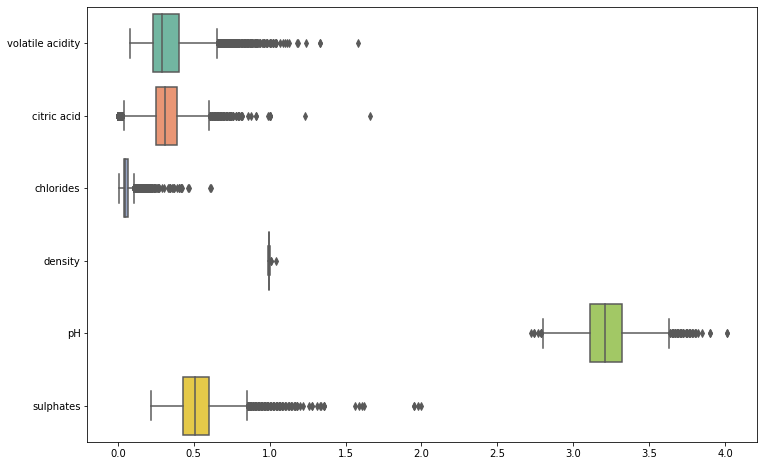

In [336]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates']], orient="h", palette="Set2");

In [337]:
y = df.iloc[:, -1]
X = df.iloc[:,:-1]



Посмотрим на распределения.

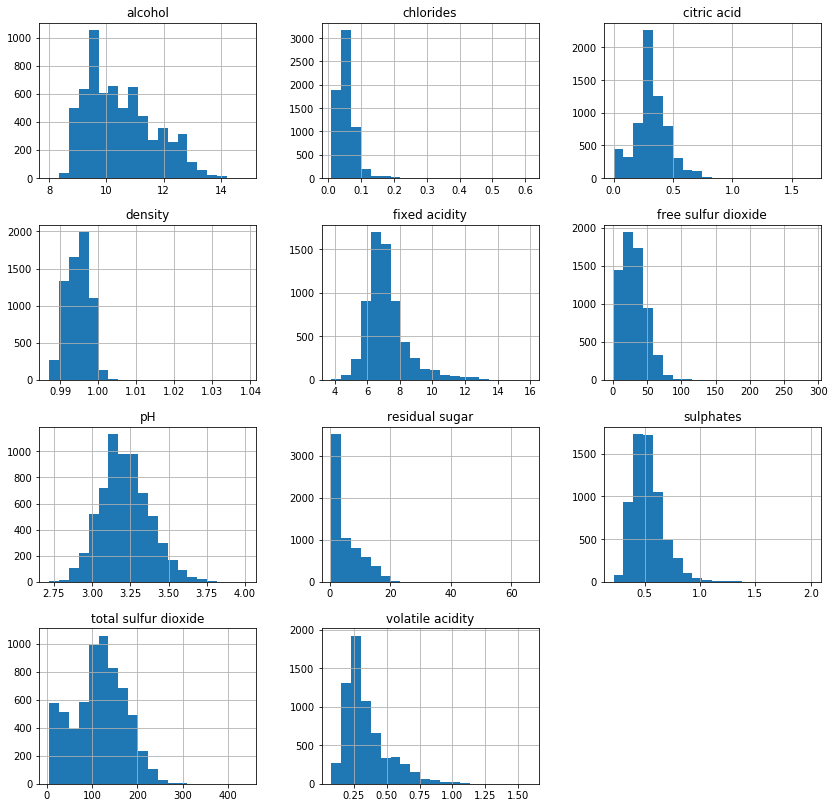

In [95]:
X.hist(figsize=(14,14), bins=20, grid=True);

Визуально можно сказать, что нормальное распределение только у кислотности, в остальном похоже на распределение Пуассона.

Снизим высокую дисперсию путём разбиения на категории - квантили. 

In [338]:
features = ['total sulfur dioxide', 'free sulfur dioxide', 'residual sugar', 'fixed acidity', 'alcohol']

In [339]:
def quantile_features(data, features):
    for feature in features:
        data.loc[data[feature] < data[feature].quantile(.25), feature] = 0
        data.loc[(data[feature] >= data[feature].quantile(.25)) & (data[feature] < data[feature].quantile(.5)), feature] = 1
        data.loc[(data[feature] >= df[feature].quantile(.5)) & (data[feature] < data[feature].quantile(.75)), feature] = 2
        data.loc[(data[feature] >= df[feature].quantile(.75)) & (data[feature] <= data[feature].max()), feature] = 3
        df[feature] = df[feature].astype('str')

In [340]:
quantile_features(X, features)

In [341]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.0,0.70,0.00,1.0,0.076,0.0,0.0,0.9978,3.51,0.56,0.0
1,3.0,0.88,0.00,1.0,0.098,1.0,0.0,0.9968,3.20,0.68,1.0
2,3.0,0.76,0.04,1.0,0.092,0.0,0.0,0.9970,3.26,0.65,1.0
3,3.0,0.28,0.56,1.0,0.075,1.0,0.0,0.9980,3.16,0.58,1.0
4,2.0,0.70,0.00,1.0,0.076,0.0,0.0,0.9978,3.51,0.56,0.0


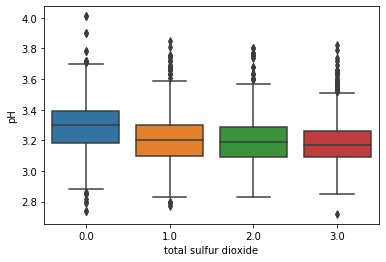

In [114]:
sns.boxplot(x="total sulfur dioxide", y="pH", data=X);

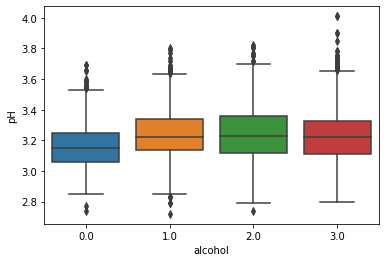

In [115]:
sns.boxplot(x="alcohol", y="pH", data=X);

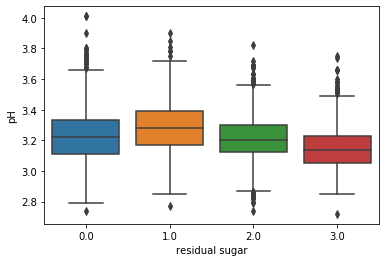

In [116]:
sns.boxplot(x="residual sugar", y="pH", data=X);

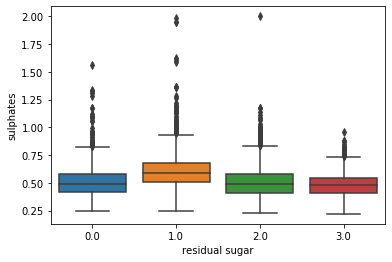

In [117]:
sns.boxplot(x="residual sugar", y="sulphates", data=X);

Получилось довольно неплохо разделить на категории, медианы различаются. В особенности распределение кислотности по уровню сахара. Наибольшую кислотность имеют вина с более низким содержанием сахара и наоборот. Проверим это утверждение интервальной оценкой медианы бутстрэпом.

In [118]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [125]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [129]:
g0 = X[X['residual sugar'] == 0].pH.values
g1 = X[X['residual sugar'] == 1].pH.values
g2 = X[X['residual sugar'] == 2].pH.values
g3 = X[X['residual sugar'] == 3].pH.values

In [145]:
g0_median_scores = list(map(np.median, get_bootstrap_samples(g0, 1000)))
g1_median_scores = list(map(np.median, get_bootstrap_samples(g1, 1000)))
g2_median_scores = list(map(np.median, get_bootstrap_samples(g2, 1000)))
g3_median_scores = list(map(np.median, get_bootstrap_samples(g3, 1000)))

In [146]:
print(stat_intervals(g0_median_scores, 0.05))
print(stat_intervals(g1_median_scores, 0.05))
print(stat_intervals(g2_median_scores, 0.05))
print(stat_intervals(g3_median_scores, 0.05))

[3.21 3.23]
[3.27 3.29]
[3.19 3.21]
[3.13 3.14]


Для нулевой и второй группы доверительные интервалы имеют общую границу. В остальном значения не пересекаются. Оценим разность
медиан для третьей и нулевой групп интервально.

In [149]:
delta_medians = list(map(lambda x: x[1] - x[0], zip(g0_median_scores, g2_median_scores)))
stat_intervals(delta_medians, 0.05)

array([-0.03, -0.01])

Наши новые категории ещё нужно проверить хи-квадратом в разрезе целевой переменной. Но сейчас я этого делать не буду, поскольку
это уже делал в других проектах.

In [377]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=43)

Проверим распределения в тренировочной и валидационной выборках. Они не должны отличаться.

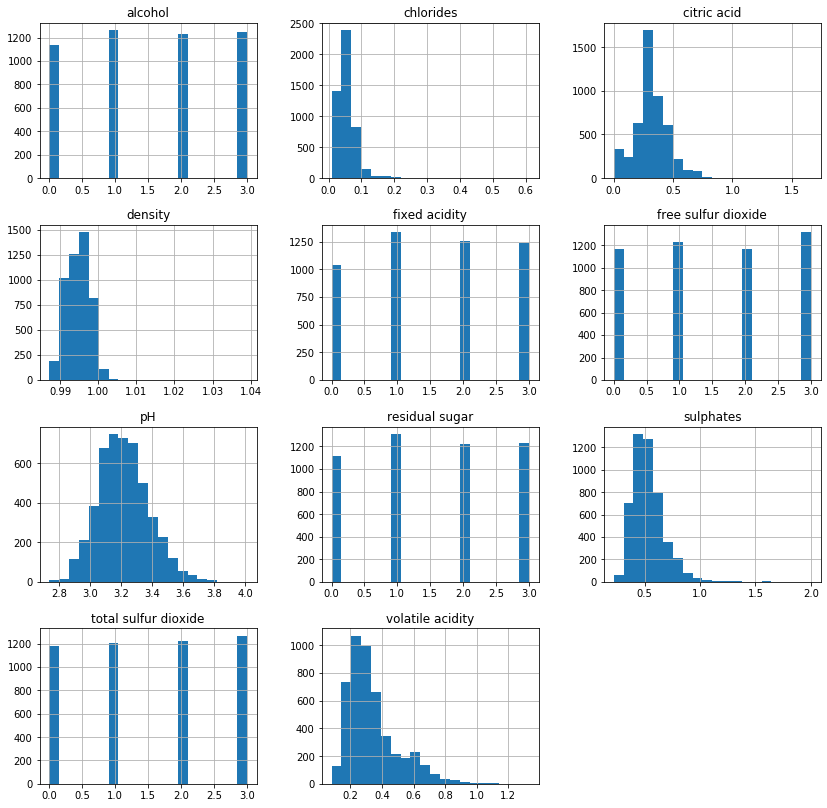

In [151]:
X_train.hist(figsize=(14,14), bins=20, grid=True);

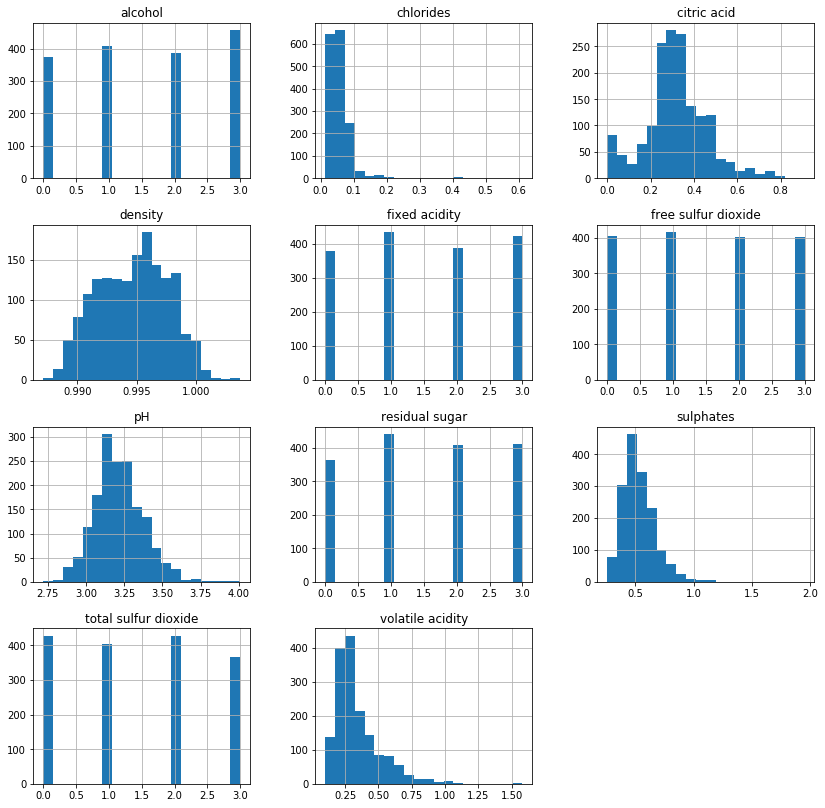

In [154]:
X_valid.hist(figsize=(14,14), bins=20, grid=True);

Вроде нормально, но лучше проверять численно параметрическим критерием если распределение нормальное и непараметрическим в обратном
случае(либо если признак категориальный). И потом сравнить.

In [378]:
X_train = pd.get_dummies(X_train, columns=features)

In [379]:
X_valid = pd.get_dummies(X_valid, columns=features)

In [382]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)

X_valid_scaled = scaler.fit_transform(X_valid)
X_valid_scaled = pd.DataFrame(X_valid_scaled)

In [357]:
from hyperopt import hp, fmin, tpe, space_eval, Trials, STATUS_OK
from functools import partial
from hyperopt.pyll.base import scope

Логистическая регрессия.

In [421]:
logit_param_space = {"penalty": hp.choice("penalty", ["l1", "l2"]),
              "tol": hp.quniform("tol", 1e-7, 1e-4, 1e-1),
              "C": hp.quniform("C", 2.0, 5.5, 0.3),
              "class_weight": hp.choice("class_weight", ["balanced", None]),
              "max_iter": scope.int(hp.quniform("max_iter", 800, 1000, 50))}

In [422]:
def optimize(params, x, y, model):
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', model(**params))
    ])
    kf = StratifiedKFold(n_splits=5)
    cv_scores = cross_val_score(pipeline, x, y, cv=kf, scoring='roc_auc')
    return np.mean(cv_scores)

In [423]:
optimization_function = partial(optimize,
                                 x=X_train_scaled, 
                                 y=y_train,
                               model=LogisticRegression)
trials = Trials()

In [424]:
%%time
lr_result = fmin(fn=optimization_function, space=logit_param_space, algo=tpe.suggest, max_evals=20, trials=trials)

print(lr_result)

100%|█████████████████████████████████████████████████| 20/20 [00:01<00:00, 10.37trial/s, best loss: 0.795264435591158]
{'C': 3.9, 'class_weight': 0, 'max_iter': 900.0, 'penalty': 1, 'tol': 0.0}
Wall time: 1.94 s


Перцептрон.

In [390]:
perceptron_param_space = {"penalty": hp.choice("penalty", ["l1", "l2"]),
              "tol": hp.quniform("tol", 1e-7, 1e-4, 1e-1),
              "alpha": hp.quniform("alpha", 1e-7, 1e-3, 1e-1),
              "eta0": hp.quniform("eta0", 0.1, 1.1, 0.1),
              "class_weight": hp.choice("class_weight", ["balanced", None])}
              #"max_iter": scope.int(hp.quniform("max_iter", 100, 500, 50))}

In [391]:
optimization_function = partial(optimize,
                                 x=X_train_scaled, 
                                 y=y_train,
                               model=Perceptron)
trials = Trials()

In [392]:
%%time
result1 = fmin(fn=optimization_function, space=perceptron_param_space, algo=tpe.suggest, max_evals=20, trials=trials)

print(result1)

100%|████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.31trial/s, best loss: 0.6910705552680424]
{'alpha': 0.0, 'class_weight': 0, 'eta0': 1.0, 'penalty': 0, 'tol': 0.0}
Wall time: 2.16 s


In [417]:
result

{'C': 3.3, 'class_weight': 0, 'max_iter': 300.0, 'penalty': 1, 'tol': 0.0}

In [425]:
best_params = space_eval(logit_param_space, result)
best_params

{'C': 3.3,
 'class_weight': 'balanced',
 'max_iter': 300,
 'penalty': 'l2',
 'tol': 0.0}

In [426]:
lr = LogisticRegression(C= 3.3, class_weight= 'balanced', max_iter=300, penalty='l2')
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict_proba(X_valid_scaled)[:, 1]
lr_preds[:10]

array([0.60609252, 0.91307151, 0.64026404, 0.92166841, 0.92191532,
       0.52688003, 0.44340606, 0.14984415, 0.65939488, 0.69904308])

In [428]:
b=1
precision, recall, thresholds = precision_recall_curve(y_valid.values, lr_preds)
fscore = (1+b**2)*(precision * recall) / (b**2*precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.274308, F-Score=0.814, Precision=0.741, Recall=0.904


Попробуем случайный лес.

In [444]:
from sklearn.ensemble import RandomForestClassifier

In [450]:
rf= RandomForestClassifier(max_depth=10, n_estimators=500, class_weight='balanced')
rf.fit(X_train, y_train)
rf_preds = rf.predict_proba(X_valid)[:, 1]
rf_preds[:10]

array([0.5761655 , 0.89782043, 0.75046115, 0.85809786, 0.96767562,
       0.51836715, 0.5675092 , 0.11078215, 0.67780124, 0.66573187])

In [451]:
b=1
precision, recall, thresholds = precision_recall_curve(y_valid.values, rf_preds)
fscore = (1+b**2)*(precision * recall) / (b**2*precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.356565, F-Score=0.857, Precision=0.802, Recall=0.920


Оценим важность признаков.

In [432]:
import shap

In [433]:
shap.initjs()

In [452]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

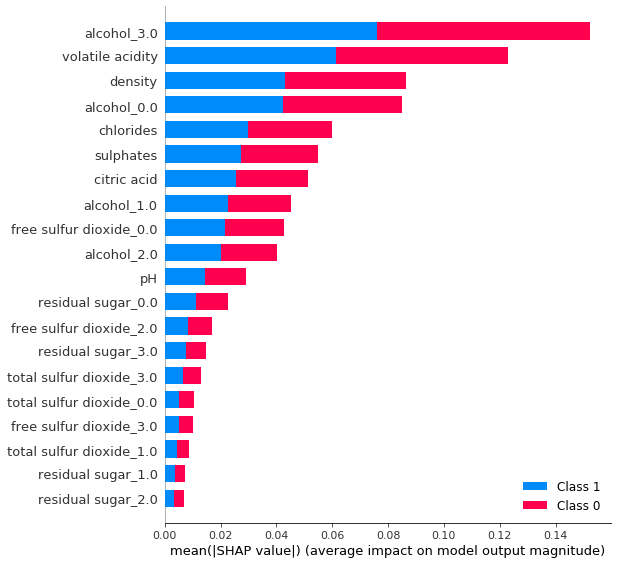

In [453]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

Ни один объект существенно не влияет на отнесение вина к тому или иному классу. Однако, наибольший вклад в качество модели внесли крепкие вина, преимущественно сладкие, затем-сухие.